In [23]:
import pandas as pd

df = pd.read_csv('ccar_merged.csv')

In [24]:
from datetime import datetime
import pandas as pd

# Combine year and week number to get a datetime column
df['date'] = pd.to_datetime(df['year'].astype(str) + df['week_number'].astype(str) + '1', format='%G%V%u')

# Sort by date
df.sort_values(['country', 'date'], inplace=True)


In [26]:
#Feature engineering (lag features)
# Create lag features of most_needs
for lag in range(1, 5):  # past 4 weeks
    df[f'most_needs_lag_{lag}'] = df.groupby('country')['most_needs'].shift(lag)


In [27]:
df.head()

,Unnamed: 0,year,week_number,country,num_deaths_battles,num_deaths_explosions_remote_violence,num_deaths_protests,num_deaths_riots,num_deaths_strategic_developments,num_deaths_violence_against_civilians,...,num_deaths_disaster,num_injured_disaster,num_affected_disaster,HDI,most_needs,date,most_needs_lag_1,most_needs_lag_2,most_needs_lag_3,most_needs_lag_4
0,0,2022,1,Afghanistan,51.0,3.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.462,64.6076,2022-01-03,NaN,NaN,NaN,NaN
144,144,2022,2,Afghanistan,49.0,18.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.462,81.6076,2022-01-10,64.6076,NaN,NaN,NaN
294,294,2022,3,Afghanistan,35.0,17.0,1.0,0.0,0.0,31.0,...,28.0,4.0,0.0,0.462,91.0076,2022-01-17,81.6076,64.6076,NaN,NaN
449,449,2022,4,Afghanistan,59.0,3.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.462,68.1076,2022-01-24,91.0076,81.6076,64.6076,NaN
608,608,2022,5,Afghanistan,18.0,3.0,0.0,0.0,1.0,7.0,...,0.0,0.0,0.0,0.462,42.1076,2022-01-31,68.1076,91.0076,81.6076,64.6076


In [28]:
# Drop rows with NaN (from lag features)
df_model = df.dropna(subset=[f'most_needs_lag_{lag}' for lag in range(1, 5)])


In [29]:
df_model.head()

,Unnamed: 0,year,week_number,country,num_deaths_battles,num_deaths_explosions_remote_violence,num_deaths_protests,num_deaths_riots,num_deaths_strategic_developments,num_deaths_violence_against_civilians,...,num_deaths_disaster,num_injured_disaster,num_affected_disaster,HDI,most_needs,date,most_needs_lag_1,most_needs_lag_2,most_needs_lag_3,most_needs_lag_4
608,608,2022,5,Afghanistan,18.0,3.0,0.0,0.0,1.0,7.0,...,0.0,0.0,0.0,0.462,42.1076,2022-01-31,68.1076,91.0076,81.6076,64.6076
763,763,2022,6,Afghanistan,31.0,8.0,0.0,0.0,0.0,11.0,...,19.0,0.0,0.0,0.462,64.1076,2022-02-07,42.1076,68.1076,91.0076,81.6076
916,916,2022,7,Afghanistan,51.0,10.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.462,87.6076,2022-02-14,64.1076,42.1076,68.1076,91.0076
1072,1072,2022,8,Afghanistan,56.0,12.0,0.0,1.0,0.0,41.0,...,0.0,0.0,0.0,0.462,93.6076,2022-02-21,87.6076,64.1076,42.1076,68.1076
1233,1233,2022,9,Afghanistan,21.0,5.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.462,46.1076,2022-02-28,93.6076,87.6076,64.1076,42.1076


In [31]:
#Modeling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

features = [col for col in df_model.columns if col.startswith('num_') or col.startswith('most_needs_lag_') or col == 'HDI']
X = df_model[features]
y = df_model['most_needs']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

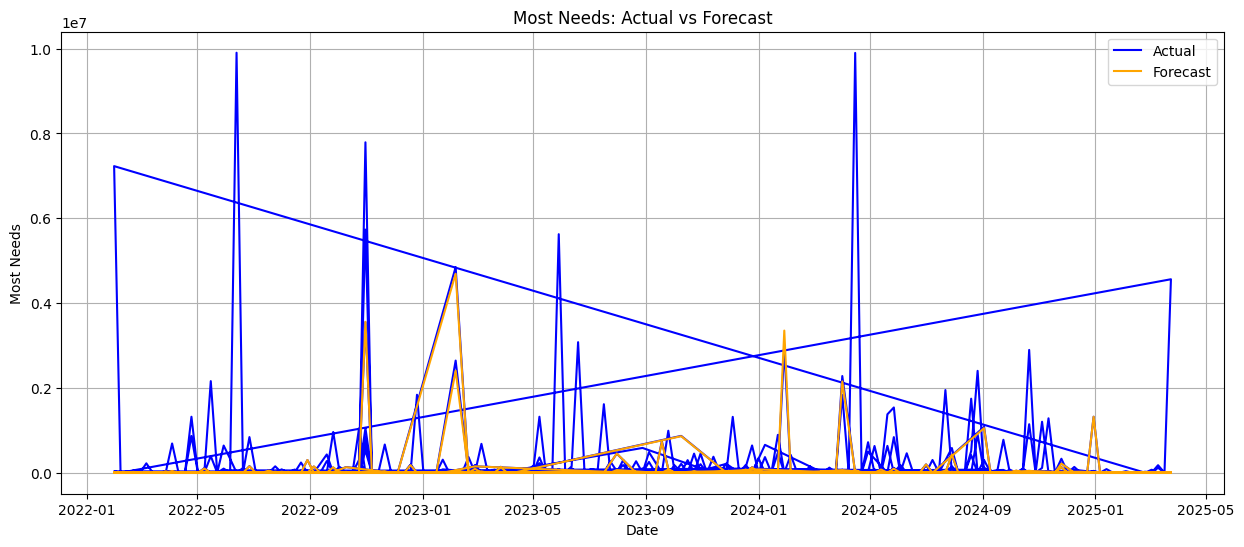

In [32]:
import matplotlib.pyplot as plt

# Set the figure size (width, height)
plt.figure(figsize=(15, 6))  # Adjust the size to your preference

# Plot the data
plt.plot(df_model['date'], df_model['most_needs'], label='Actual', color='blue')
plt.plot(df_model['date'].iloc[-len(y_test):], model.predict(X_test), label='Forecast', color='orange')

# Add title and labels
plt.title('Most Needs: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Most Needs')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


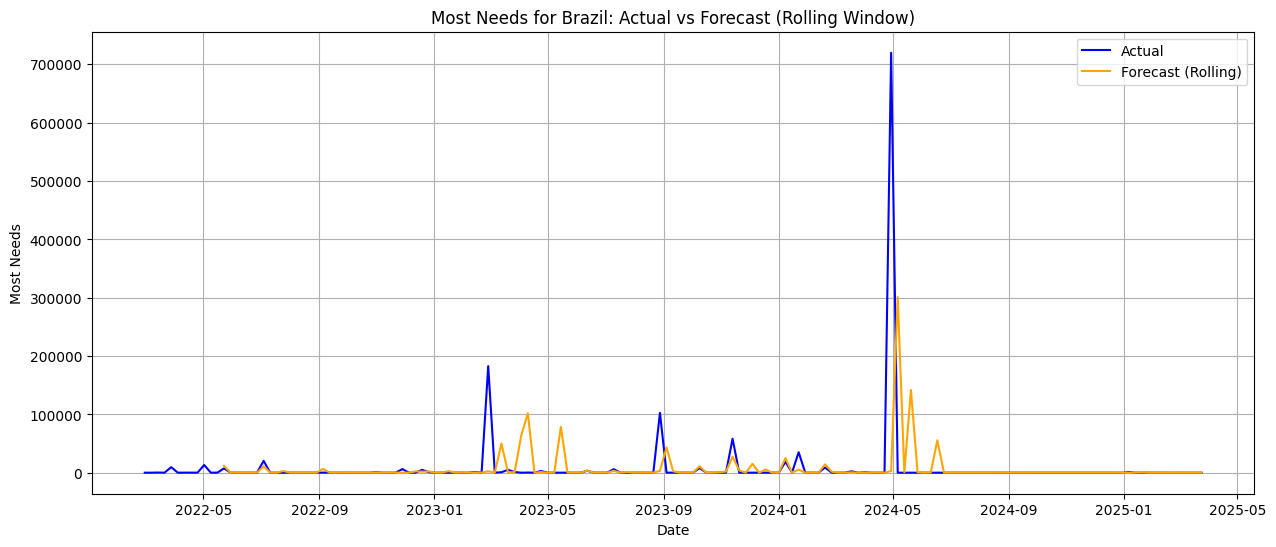

In [33]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Specify the country you want to plot
country_to_plot = 'Brazil'  # Replace with your country

# Filter the DataFrame for the specific country
df_country = df_model[df_model['country'] == country_to_plot].copy()

# Ensure the data is sorted by date
df_country = df_country.sort_values(by='date')

# Create lag features for 'most_needs' (if necessary)
for lag in range(1, 5):  # past 4 weeks
    df_country.loc[:, f'most_needs_lag_{lag}'] = df_country['most_needs'].shift(lag)

# Drop rows with NaN due to lag features
df_country = df_country.dropna(subset=[f'most_needs_lag_{lag}' for lag in range(1, 5)])

# Define the features (you can also add country-specific features here)
features = [col for col in df_country.columns if col.startswith('num_') or col.startswith('most_needs_lag_') or col == 'HDI']
X = df_country[features]  # Feature matrix (X)
y = df_country['most_needs']  # Target variable (y)

# Define window size (e.g., 12 months or 12 weeks)
window_size = 12  # Define as per your requirement (e.g., 12 weeks)

# Prepare for storing predictions
y_pred_rolling = []

# Rolling window approach: Train the model on the past 'window_size' periods
for i in range(window_size, len(df_country)):
    # Use the past 'window_size' rows for training
    X_train = X.iloc[i - window_size:i]
    y_train = y.iloc[i - window_size:i]

    # Train the model
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predict the next period (e.g., the 13th period in this case)
    X_test = X.iloc[i:i + 1]  # Predict the next observation (next period)
    y_pred_rolling.append(model.predict(X_test)[0])

# Add the rolling predictions to the DataFrame
df_country['forecast_rolling'] = pd.Series([None] * window_size + y_pred_rolling, index=df_country.index)

# Plot the actual and forecasted values
plt.figure(figsize=(15, 6))
plt.plot(df_country['date'], df_country['most_needs'], label='Actual', color='blue')
plt.plot(df_country['date'], df_country['forecast_rolling'], label='Forecast (Rolling)', color='orange')

# Add title and labels
plt.title(f'Most Needs for {country_to_plot}: Actual vs Forecast (Rolling Window)')
plt.xlabel('Date')
plt.ylabel('Most Needs')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




Mean Absolute Error (Random Forest): 6006.11154362416
Mean Absolute Error (XGBoost): 8758.81188123391


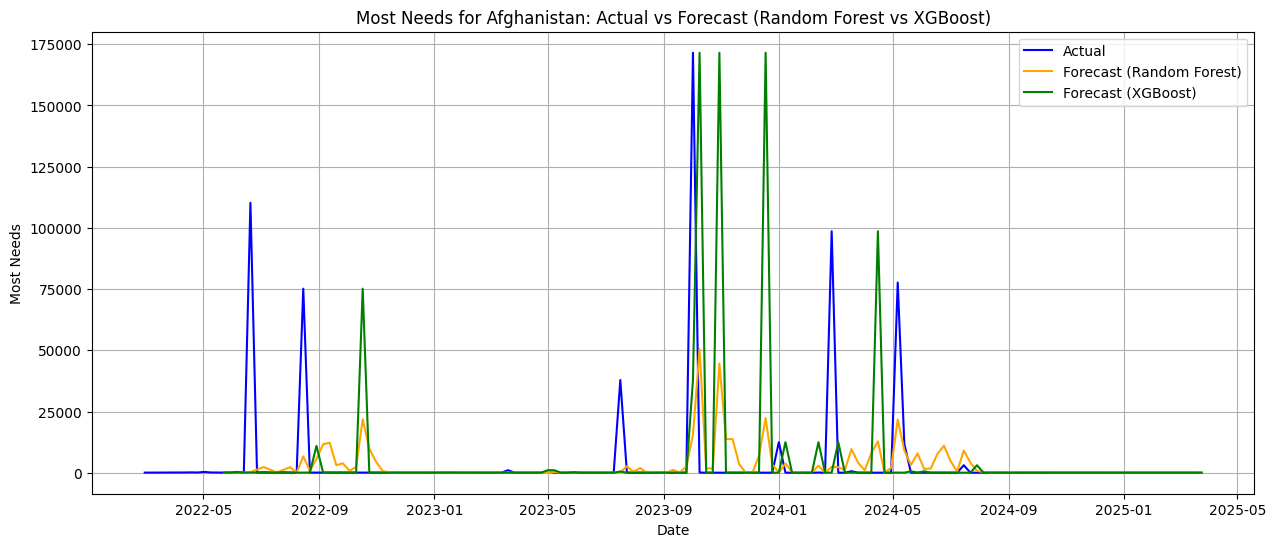

In [35]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Specify the country you want to plot
country_to_plot = 'Afghanistan'  # Replace with your country

# Filter the DataFrame for the specific country
df_country = df_model[df_model['country'] == country_to_plot].copy()

# Ensure the data is sorted by date
df_country = df_country.sort_values(by='date')

# Create lag features for 'most_needs' (if necessary)
for lag in range(1, 5):  # past 4 weeks
    df_country.loc[:, f'most_needs_lag_{lag}'] = df_country['most_needs'].shift(lag)

# Drop rows with NaN due to lag features
df_country = df_country.dropna(subset=[f'most_needs_lag_{lag}' for lag in range(1, 5)])

# Define the features (you can also add country-specific features here)
features = [col for col in df_country.columns if col.startswith('num_') or col.startswith('most_needs_lag_') or col == 'HDI']
X = df_country[features]  # Feature matrix (X)
y = df_country['most_needs']  # Target variable (y)

# Define window size (e.g., 12 months or 12 weeks)
window_size = 12  # Define as per your requirement (e.g., 12 weeks)

# Prepare for storing predictions
y_pred_rolling_rf = []
y_pred_rolling_xgb = []

# Rolling window approach: Train the model on the past 'window_size' periods
for i in range(window_size, len(df_country)):
    # Use the past 'window_size' rows for training
    X_train = X.iloc[i - window_size:i]
    y_train = y.iloc[i - window_size:i]

    # Train Random Forest Regressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X.iloc[i:i + 1])  # Predict the next observation (next period)
    y_pred_rolling_rf.append(rf_pred[0])

    # Train XGBoost Regressor model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X.iloc[i:i + 1])  # Predict the next observation (next period)
    y_pred_rolling_xgb.append(xgb_pred[0])

# Add the rolling predictions to the DataFrame
df_country['forecast_rolling_rf'] = pd.Series([None] * window_size + y_pred_rolling_rf, index=df_country.index)
df_country['forecast_rolling_xgb'] = pd.Series([None] * window_size + y_pred_rolling_xgb, index=df_country.index)

# Calculate MAE (Mean Absolute Error) for both models
mae_rf = mean_absolute_error(y[window_size:], y_pred_rolling_rf)
mae_xgb = mean_absolute_error(y[window_size:], y_pred_rolling_xgb)

print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')

# Plot the results for both models
plt.figure(figsize=(15, 6))

# Plot actual values and predictions
plt.plot(df_country['date'], df_country['most_needs'], label='Actual', color='blue')
plt.plot(df_country['date'], df_country['forecast_rolling_rf'], label='Forecast (Random Forest)', color='orange')
plt.plot(df_country['date'], df_country['forecast_rolling_xgb'], label='Forecast (XGBoost)', color='green')

# Add title and labels
plt.title(f'Most Needs for {country_to_plot}: Actual vs Forecast (Random Forest vs XGBoost)')
plt.xlabel('Date')
plt.ylabel('Most Needs')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


     |████████████████████████████████| 1.7 MB 4.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for lightgbm: filename=lightgbm-4.6.0-py3-none-linux_x86_64.whl size=3183868 sha256=ce15786b6f5072732c0a3a871a414a2027ee6fd3ffb3cf0989656ecf7b0d90a9
  Stored in directory: /home/user/.cache/pip/wheels/25/7d/17/7b86ac11153bfe8f4ec30f8439283b0e76428a6be5d9cb0d4a
Successfully built lightgbm
Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 102.424266

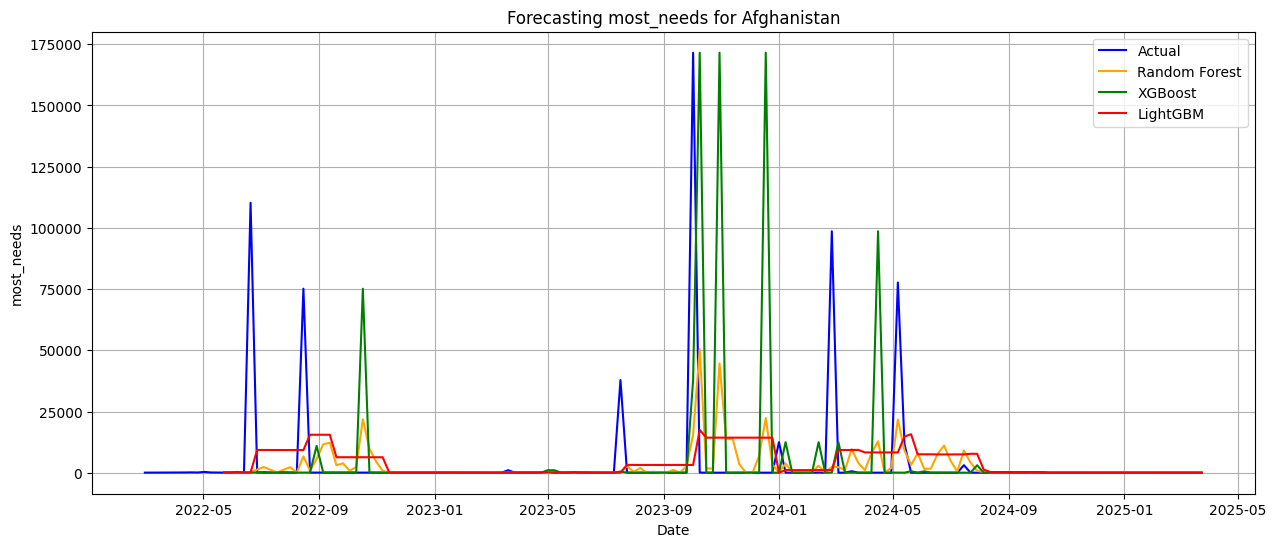

In [37]:
%pip install lightgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Reuse df_country from previous step (filtered by country and with lag features)

# Prepare to store predictions
y_pred_rolling_lgb = []

# Rolling window setup
for i in range(window_size, len(df_country)):
    X_train = X.iloc[i - window_size:i]
    y_train = y.iloc[i - window_size:i]

    # Train LightGBM model
    lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
    lgb_model.fit(X_train, y_train)

    # Predict for the next time step
    lgb_pred = lgb_model.predict(X.iloc[i:i + 1])
    y_pred_rolling_lgb.append(lgb_pred[0])

# Add predictions to DataFrame
df_country['forecast_rolling_lgb'] = pd.Series([None] * window_size + y_pred_rolling_lgb, index=df_country.index)

# Calculate MAE
mae_lgb = mean_absolute_error(y[window_size:], y_pred_rolling_lgb)
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df_country['date'], df_country['most_needs'], label='Actual', color='blue')
plt.plot(df_country['date'], df_country['forecast_rolling_rf'], label='Random Forest', color='orange')
plt.plot(df_country['date'], df_country['forecast_rolling_xgb'], label='XGBoost', color='green')
plt.plot(df_country['date'], df_country['forecast_rolling_lgb'], label='LightGBM', color='red')
plt.title(f'Forecasting most_needs for {country_to_plot}')
plt.xlabel('Date')
plt.ylabel('most_needs')
plt.legend()
plt.grid(True)
plt.show()
